## **가설 설정**


**(1) 중동 지역(예: Iraq, Pakistan 등)에서 테러 사건이 가장 많이 발생했을 것이다.** <br>
**(2) 테러 피해자 수 (사망자+부상자)는 사용된 무기 유형과 밀접한 관련이 있다.**


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_1990 = pd.read_excel("/content/drive/MyDrive/LikeLion/Final-Project/terror_finalver(plz).xlsx")

In [4]:
df_1990.shape

(173597, 19)

In [5]:
df_1990.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173597 entries, 0 to 173596
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       173597 non-null  int64  
 1   eventid          173597 non-null  int64  
 2   iyear            173597 non-null  int64  
 3   imonth           173597 non-null  int64  
 4   iday             173597 non-null  int64  
 5   country_txt      173597 non-null  object 
 6   region_txt       173597 non-null  object 
 7   provstate        173597 non-null  object 
 8   latitude         173597 non-null  object 
 9   longitude        173597 non-null  object 
 10  city             173597 non-null  object 
 11  success          173597 non-null  int64  
 12  attacktype1_txt  173597 non-null  object 
 13  targtype1_txt    173597 non-null  object 
 14  weaptype1_txt    173597 non-null  object 
 15  nkill            173597 non-null  float64
 16  nwound           173597 non-null  int6

In [6]:
df_1990['total_victim'] = df_1990['nkill'] + df_1990['nwound']

In [7]:
# 이름을 간략히 변경
df_1990['weaptype1_txt'] = df_1990['weaptype1_txt'].replace(
    'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)',
    'Vehicle'
)

In [8]:
# 중복 제거 전 행 수 확인
print(f"중복 제거 전: {df_1990.shape[0]} rows")

# 'eventid'와 'Unnamed: 0' 제외한 컬럼 기준으로 중복 제거
df_1990 = df_1990.drop_duplicates(subset=[col for col in df_1990.columns if col not in ['eventid', 'Unnamed: 0']])

# 중복 제거 후 행 수 확인
print(f"중복 제거 후: {df_1990.shape[0]} rows")

# 'Unnamed: 0' 컬럼 삭제
df_1990.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')

중복 제거 전: 173597 rows
중복 제거 후: 167685 rows


<ipython-input-8-b0304ca1e3f7>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1990.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')


## **가설(1) 추론 통계**

### **카이제곱 검정을 사용하는 이유**

**1. 목적**
- 범주형 변수 간의 관계 또는 집단 간 비율 차이가 우연에 의한 것인지,
- 통계적으로 유의미한 차이가 있는지를 판단할 때 사용

<br>

**2. 현재 상황**
- region_txt는 범주형 변수 (예: Middle East & North Africa, South Asia 등)
- 지역별 테러 발생 횟수(빈도)를 비교하고자 한다.
- **그 차이가 통계적으로 우연이 아닌가?**를 검증하는 것이 목적

→ 카이제곱 적합도 검정 또는 독립성 검정을 사용하고자 한다.

### **적합도 검정 & 독립성 검정**
1. 적합도 검정 (Goodness of Fit)
- 한 개의 범주형 변수(지역) → 관측값과 기대값 비교
- 가설1을 위한 검정

<br>

2. 독립성 검정 (Independence)
- 두 범주형 변수 간 관계 → 예: region_txt vs success
- 성공 여부와 지역이 연관 있는가? 보고 싶을 때 사용

## **가설(1)에 대한 카이제곱 적합도 검정**

- 가설(1) : 중동 지역(예: Iraq, Pakistan 등)에서 테러 사건이 가장 많이 발생했을 것이다.
- 관측값: 실제 지역별 사건 수
- 귀무가설: 모든 지역에서 테러 발생 수가 동일하다
- 대립가설: "일부 지역에서 유의하게 많거나 적게 발생한다

In [9]:
import pandas as pd
from scipy.stats import chisquare

# 지역별 사건 수 카운트
region_counts = df_1990['region_txt'].value_counts().sort_index()

# 관측값: 실제 지역별 사건 수
observed = region_counts.values

# 기대값: 모든 지역에 사건이 고르게 분포되었다고 가정 (균등 기대)
expected = [observed.sum() / len(observed)] * len(observed)

# 카이제곱 적합도 검정 실행
chi2_stat, p_value = chisquare(f_obs=observed, f_exp=expected)

# 결과 출력
print("카이제곱 통계량:", chi2_stat.round(3))
print("p-value:", p_value)

# 해석
if p_value < 0.05:
    print("유의미한 차이가 존재함 → 특정 지역에서 사건이 유의하게 많을 수 있음")
else:
    print("지역 간 사건 수 차이는 우연일 수 있음")


카이제곱 통계량: 289031.16
p-value: 0.0
유의미한 차이가 존재함 → 특정 지역에서 사건이 유의하게 많을 수 있음


### **해석!**

1. **p-value = 0.0**
- p-value는 유의수준(보통 0.05)보다 훨씬 작기 때문에,
- 귀무가설(모든 지역에서 사건 수가 같다) 를 기각 <br>
→ 지역 간 사건 수에 통계적으로 유의미한 차이가 있음.

<br>

2. **카이제곱 값이 매우 큼**
- 289,031이라는 값은 지역별 사건 수가 균등하게 발생하지 않았다는 강한 증거가 된다.
- 즉, 일부 지역에 사건이 집중되어 있다는 것을 지지

→ 어느 지역이 유의하게 많은지는 직접적으로 알려주지 않음 따라서 추가 검정을 진행하고자 한다.

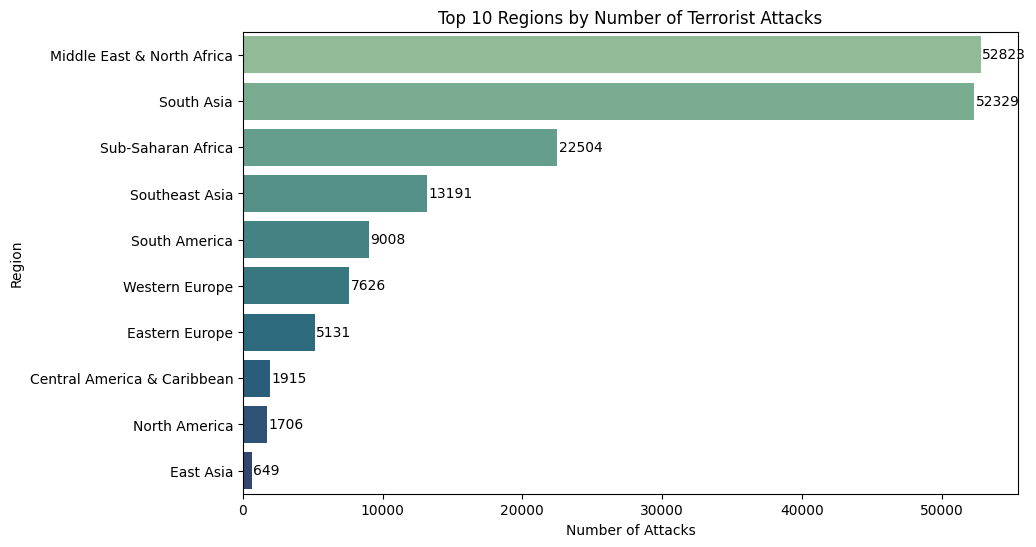

In [10]:
# Top 10 지역별 테러 발생 건수
top_regions = df_1990['region_txt'].value_counts().head(10)

# 그래프 생성
plt.figure(figsize=(10, 6))
ax = sns.barplot( x=top_regions.values, y=top_regions.index, hue=top_regions.index, palette='crest')

# 수치 표시
for i, value in enumerate(top_regions.values):
    ax.text(value + 100, i, str(value), va='center')

plt.title("Top 10 Regions by Number of Terrorist Attacks")
plt.xlabel("Number of Attacks")
plt.ylabel("Region")
plt.show()

## **가설(1)에 대한 추가 검정**

- “중동 지역에서 발생한 사건 수가 전체 평균보다 유의하게 많은가?” 를 정확히 검정

### **z-score**
- Z-test for proportions는 **특정 범주**가 전체에서 차지하는 비율이 기대값(전체 평균)보다 유의하게 다른지를 검정
- Z-통계량 :  관측된 비율과 기대 비율의 차이가 표준 오차(불확실성) 대비 얼마나 큰지를 나타내는 값

In [11]:
from statsmodels.stats.proportion import proportions_ztest

# 중동 지역 설정
middle_east_region = ['Middle East & North Africa']

# 전체 사건 수
total_incidents = len(df_1990)

# 중동 지역 사건 수
middle_east_count = df_1990[df_1990['region_txt'].isin(middle_east_region)].shape[0]

# 전체 지역 수 (고르게 발생했다고 가정할 때의 기대 비율)
expected_proportion = 1 / df_1990['region_txt'].nunique()

# Z-test 실행
z_stat, p_val = proportions_ztest(count=middle_east_count,
                                   nobs=total_incidents,
                                   value=expected_proportion)

print("Z-통계량:", z_stat.round(3))
print("p-value:", p_val)

if p_val < 0.05:
    print("→ 중동 지역에서 사건이 통계적으로 유의하게 많음.")
else:
    print("→ 중동 지역 사건 수는 통계적으로 유의하지 않음.")


Z-통계량: 204.235
p-value: 0.0
→ 중동 지역에서 사건이 통계적으로 유의하게 많음.


### **해석!**
- Z = 204.235
- p-value ≈ 0.0  <br>

  → 귀무가설 완전히 기각 <br>

- 중동 지역은 다른 지역보다 유의하게 많은 테러가 발생한 지역이라는 사실이 강하게 입증됨


### **잔차 분석**
- 카이제곱 검정 결과에서, **어느 지역이 기대보다 많거나 적은가?**를 정량적으로 확인
- 표준화 잔차(Standardized Residual)
  - 1.96 이상이면 → 통계적으로 그 지역이 기대보다 유의하게 큼
  - -1.96 이하면 → 기대보다 유의하게 적음

In [12]:
import pandas as pd
from scipy.stats import chisquare
import numpy as np

# 지역별 사건 수
region_counts = df_1990['region_txt'].value_counts().sort_index()
observed = region_counts.values
expected = [observed.sum() / len(observed)] * len(observed)

# 잔차 계산
residuals = observed - expected
standardized_residuals = residuals / np.sqrt(expected)

# 표로 정리
residual_df = pd.DataFrame({
    'Region': region_counts.index,
    'Observed': observed,
    'Expected': expected,
    'Residual': residuals,
    'Standardized Residual': standardized_residuals
})

# 절댓값이 큰 순서로 정렬해서 확인
residual_df = residual_df.sort_values(by='Standardized Residual', ascending=False)
display(residual_df)

,Region,Observed,Expected,Residual,Standardized Residual
5,Middle East & North Africa,52823,13973.75,38849.25,328.644338
8,South Asia,52329,13973.75,38355.25,324.465356
10,Sub-Saharan Africa,22504,13973.75,8530.25,72.161454
9,Southeast Asia,13191,13973.75,-782.75,-6.621656
7,South America,9008,13973.75,-4965.75,-42.007648
11,Western Europe,7626,13973.75,-6347.75,-53.698645
4,Eastern Europe,5131,13973.75,-8842.75,-74.805040
1,Central America & Caribbean,1915,13973.75,-12058.75,-102.010719
6,North America,1706,13973.75,-12267.75,-103.778749
3,East Asia,649,13973.75,-13324.75,-112.720417


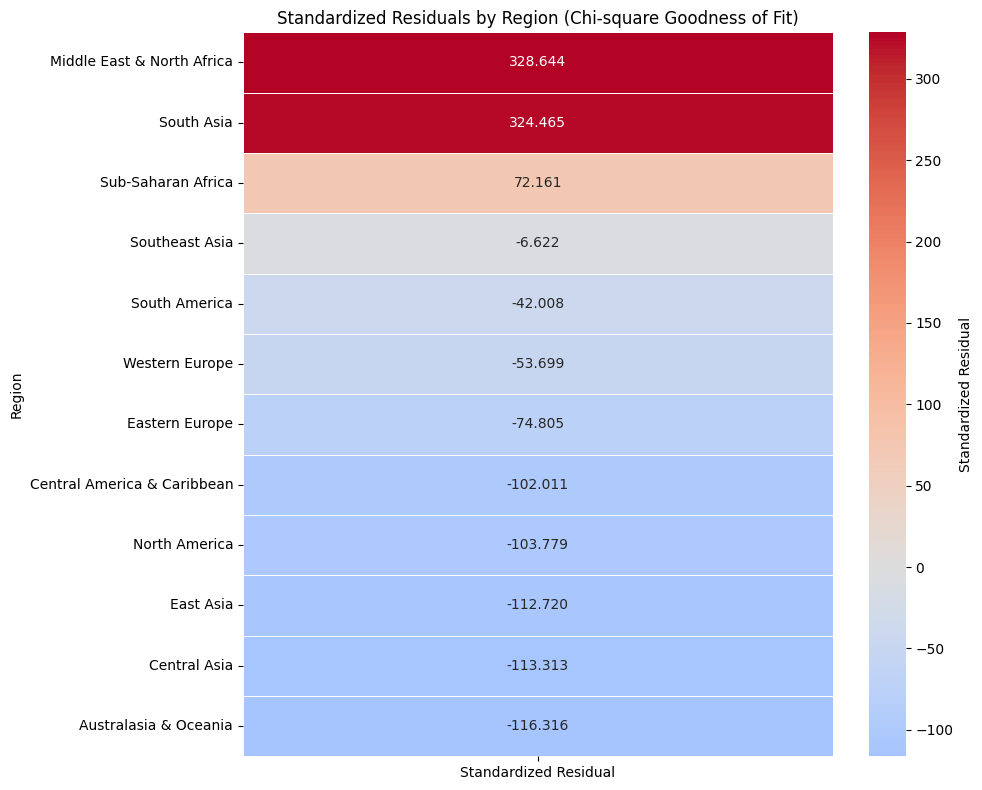

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화를 위해 index 재설정
residual_df_sorted = residual_df.sort_values('Standardized Residual', ascending=False).set_index('Region')

plt.figure(figsize=(10, 8))

# 단일 컬럼 'Standardized Residual'에 대한 히트맵
sns.heatmap(residual_df_sorted[['Standardized Residual']],
            annot=True,
            cmap='coolwarm',
            fmt=".3f",
            center=0,
            linewidths=0.5,
            cbar_kws={'label': 'Standardized Residual'})

plt.title('Standardized Residuals by Region (Chi-square Goodness of Fit)')
plt.xlabel('')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

### **해석!**

- Standardized Residual ≥ 1.96면 통계적으로 유의하게 큰 값을 의미
- 328, 324 등의 매우 큰 값 출력
- 중동(Middle East & North Africa) 지역은 "기대값보다 사건 수가 유의하게 많다"는 것이 통계적으로 입증

→ 따라서 **가설 지지**

<ipython-input-14-6e80493da64f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Standardized Residual', data=plot_df,


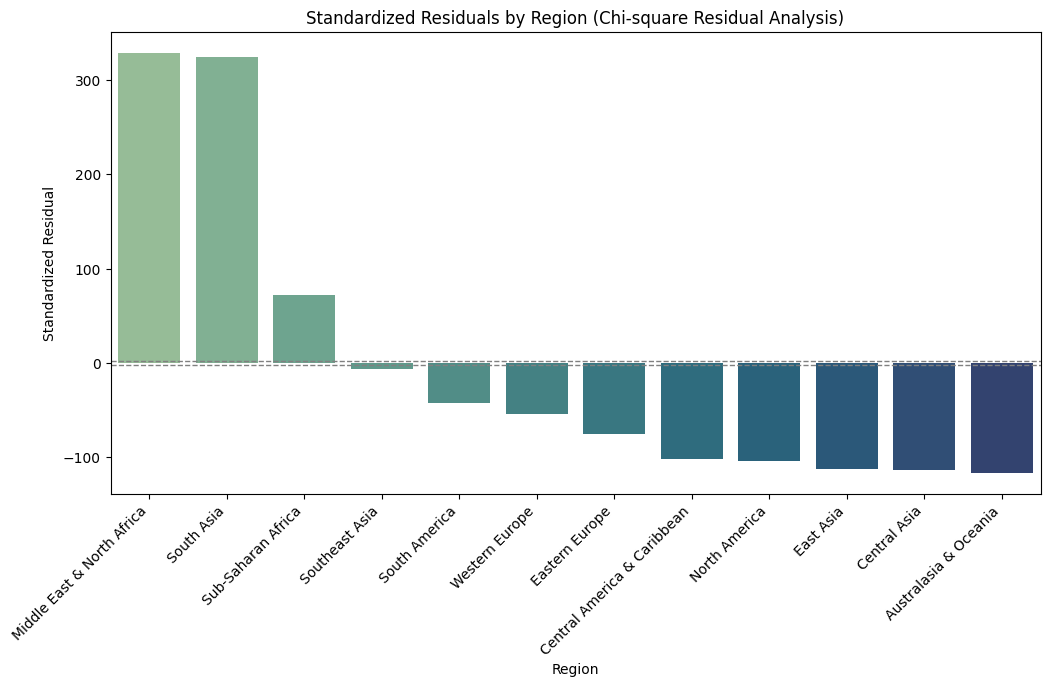

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프: 표준화 잔차 기준 정렬
plot_df = residual_df.reset_index(drop=True)
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Standardized Residual', data=plot_df,
            palette='crest', order=plot_df.sort_values('Standardized Residual', ascending=False)['Region'])

# 표준화 잔차 기준 ±1.96
plt.axhline(y=1.96, color='gray', linestyle='--', linewidth=1)
plt.axhline(y=-1.96, color='gray', linestyle='--', linewidth=1)
plt.title('Standardized Residuals by Region (Chi-square Residual Analysis)')
plt.ylabel('Standardized Residual')
plt.xlabel('Region')
plt.xticks(rotation=45, ha='right')
plt.show()

## **가설(1) 연계 : 지역 ↔ 공격 성공 카이제곱 독립성 검정**
- 귀무가설(H₀) : 지역과 테러 성공 여부는 서로 독립적이다 <br>
→ 지역에 따라 성공률이 변하지 않는다

<br>

- 대립가설(H₁) : 지역과 테러 성공 여부는 서로 독립적이지 않다 <br>
→ 지역에 따라 테러가 성공할 확률에 차이가 있다

In [15]:
from scipy.stats import chi2_contingency

# 지역 vs 공격 성공 여부 교차표
contingency_table = pd.crosstab(df_1990['region_txt'], df_1990['success'])

# 카이제곱 독립성 검정
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("카이제곱 독립성 검정 결과")
print(f"Chi-square 통계량: {chi2:.3f}")
print(f"p-value: {p:.3f}")

if p < 0.05:
    print("→ 지역과 공격 성공 여부는 통계적으로 유의한 관계가 있음.")
else:
    print("→ 지역과 성공 여부는 통계적으로 독립적임.")


카이제곱 독립성 검정 결과
Chi-square 통계량: 1126.902
p-value: 0.000
→ 지역과 공격 성공 여부는 통계적으로 유의한 관계가 있음.


### **해석!**
- 카이제곱 통계량 : 1126
- p-value가 0.05보다 훨씬 작음 (≈ 0.000) <br>
→ 귀무가설 기각

- 결론: 지역에 따라 테러가 성공할 확률이 유의하게 다르다.

### **성공률이 높은 지역**
- 성공률 계산 :
- GTD 데이터에서 성공률은 success == 1의 비율이며,
- 단순히 0과 1의 평균값을 계산하면 됨. (평균 = 성공 비율)

In [16]:
success_rate_by_region = df_1990.groupby('region_txt')['success'].mean().sort_values(ascending=False)
print(success_rate_by_region)

region_txt
Central America & Caribbean    0.920627
Sub-Saharan Africa             0.920192
South America                  0.913299
Central Asia                   0.898100
Australasia & Oceania          0.897321
Southeast Asia                 0.876583
Middle East & North Africa     0.874827
South Asia                     0.862046
Eastern Europe                 0.860651
North America                  0.848183
East Asia                      0.847458
Western Europe                 0.795830
Name: success, dtype: float64


<ipython-input-17-40c7effe79e5>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Success Rate', y='Region', data=rate_df, palette='YlGnBu')


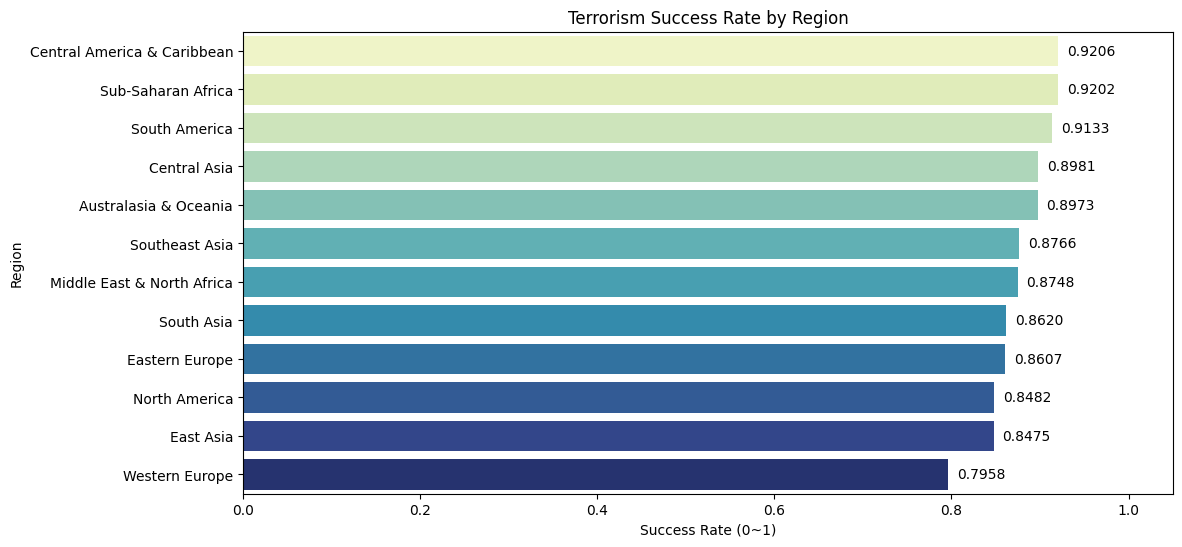

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터프레임 변환
rate_df = success_rate_by_region.reset_index()
rate_df.columns = ['Region', 'Success Rate']

# 시각화
plt.figure(figsize=(12,6))
ax = sns.barplot(x='Success Rate', y='Region', data=rate_df, palette='YlGnBu')

# 수치 표시
for index, row in rate_df.iterrows():
    plt.text(row['Success Rate'] + 0.01,
             index,
             f"{row['Success Rate']:.4f}",
             va='center')

plt.title("Terrorism Success Rate by Region")
plt.xlabel("Success Rate (0~1)")
plt.ylabel("Region")
plt.xlim(0, 1.05)
plt.show()

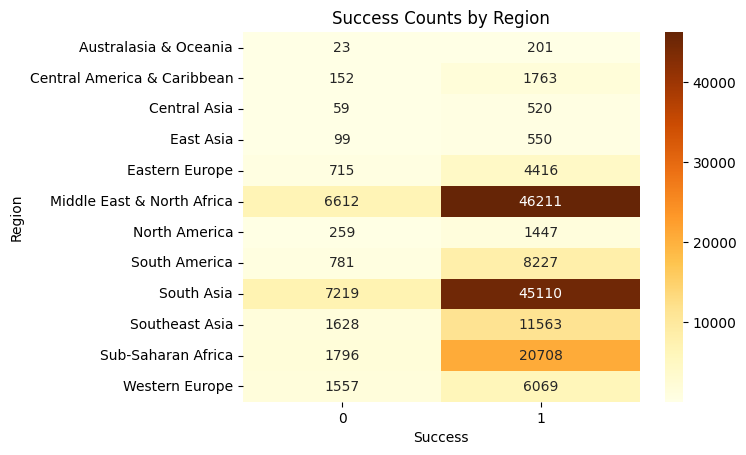

In [18]:
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlOrBr')
plt.title("Success Counts by Region")
plt.ylabel("Region")
plt.xlabel("Success")
plt.show()

### **잔차 분석**

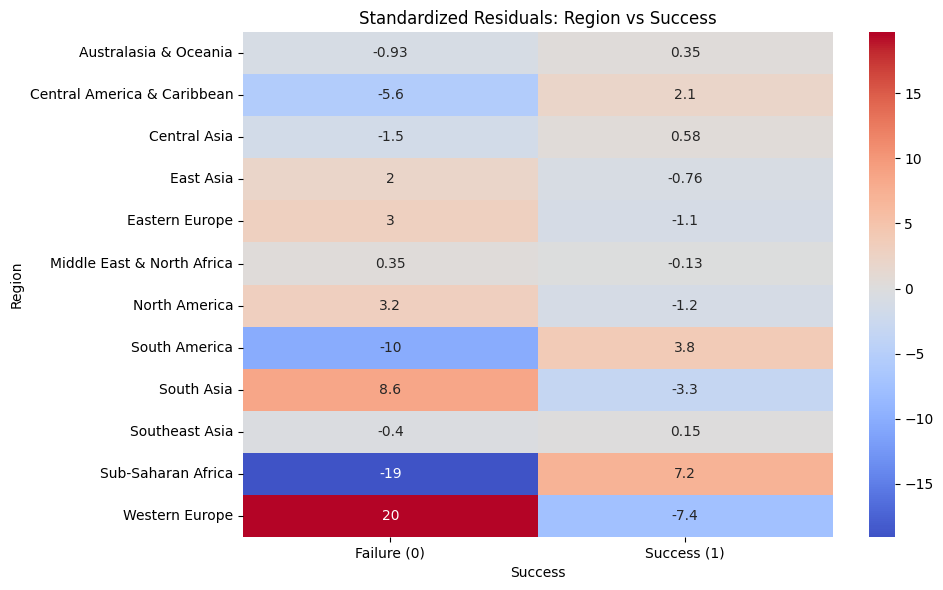

In [19]:
# 교차표 (지역 vs 성공 여부)
contingency_table = pd.crosstab(df_1990['region_txt'], df_1990['success'])

# 기대값 계산 포함한 카이제곱 검정
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(contingency_table)

# 표준화 잔차 계산
observed = contingency_table.values
residuals = (observed - expected) / (expected ** 0.5)

# 시각화를 위해 데이터프레임으로 변환
residuals_df = pd.DataFrame(residuals,
                            index=contingency_table.index,
                            columns=['Failure (0)', 'Success (1)'])

# 히트맵 시각화
plt.figure(figsize=(10,6))
sns.heatmap(residuals_df, annot=True, cmap='coolwarm', center=0)
plt.title("Standardized Residuals: Region vs Success")
plt.xlabel("Success")
plt.ylabel("Region")
plt.tight_layout()
plt.show()


### **해석!**

- Failure(0)
  - Western Europe → +20 <br>
→ 서유럽에서는 실패한 테러가 기대보다 훨씬 많음

  - South Asia → +8.6 <br>
→ 남아시아에서도 실패가 기대보다 많음

  - Sub-Saharan Africa → -19 <br>
→ 사하라 이남 아프리카는 실패가 매우 적었음 → 성공률 높음(0.9202)

- Success(1)
  - Sub-Saharan Africa → 7.2 <br>
→ 사하라 이남 아프리카는 성공한 테러가 기대가 많음

  - Western Europe → -7.4 <br>
→ 서유럽에서는 성공한 테러가 기대보다 적음

- 표준화 잔차 히트맵 분석 결과, **서유럽(Western Europe)**은 실패한 테러가 기대보다 유의하게 많고 성공한 테러는 적어, 성공률이 통계적으로 유의하게 낮은 지역임을 알 수 있다. <br>
반면, **사하라 이남 아프리카(Sub-Saharan Africa)**는 실패가 기대보다 현저히 적고 성공은 더 많아, 성공률이 매우 높은 지역임을 알 수 있다.


## **가설(2) 추론 통계**
#### **1. ANOVA (분산분석, Analysis of Variance)** <br>

(1) 여러 그룹 간 평균 차이가 유의미한가를 검정하는 방법
- 예: “무기 유형별로 평균 피해자 수가 다를까?”

(2) 가정 조건
- 정규성: 각 그룹의 데이터가 정규분포를 따라야 함
- 등분산성: 각 그룹의 분산이 비슷해야 함
- 독립성: 관측값들끼리 독립적이어야 함

(3) 귀무가설(H₀) :
- 모든 무기 유형의 평균은 같다

#### **2. Kruskal-Wallis 검정 (비모수 분산분석)** <br>
- 순위별 일원 분산 분석 <br>

(1) ANOVA와 비슷하지만, 정규성/등분산성 가정을 하지 않음
- 데이터를 순위(rank)로 바꿔서 비교 → 비모수 검정

(2) 왜 필요할까?
- 현실 데이터는 종종 정규분포 X, 이상치 많음, 분산이 다름
- 예: 테러 피해자 수처럼 한쪽으로 치우친 경우 → ANOVA 부적합

(3) 귀무가설(H₀):
- 모든 무기 유형의 분포(중앙값)는 같다

<br>

- ANOVA는 데이터가 깨끗한 정규분포일 때 적합하고,
- Kruskal-Wallis는 현실적인 이상치·비대칭 분포 상황에 더 강하다.

### **Shapiro-Wilk 정규성 검정**
- 결과를 통해 각 무기 유형별 피해자 수(total_victim)가 정규분포를 따르는지 여부를 판단

In [29]:
weapon_type_mapping = {
    "Explosives": "폭발물",
    "Firearms": "화기",
    "Unknown": "알 수 없음",
    "Incendiary": "방화물",
    "Melee": "근접 무기",
    "Chemical": "화학 물질",
    "Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)": "차량 (차량 폭탄 제외)",
    "Sabotage Equipment": "파괴 장비",
    "Other": "기타",
    "Biological": "생물학 무기",
    "Fake Weapons": "가짜 무기",
    "Radiological": "방사능 무기"
}

df_1990["weaptype1_txt_kr"] = df_1990["weaptype1_txt"].map(weapon_type_mapping)


In [30]:
# 정규성 검정 (Shapiro-Wilk)
from scipy.stats import shapiro

for name, group in df_1990.groupby('weaptype1_txt_kr'):
    stat, p = shapiro(group['total_victim'])
    print(f"{name} - p-value: {p:.5f}")

가짜 무기 - p-value: 0.00000
근접 무기 - p-value: 0.00000
기타 - p-value: 0.00000
방사능 무기 - p-value: 1.00000
방화물 - p-value: 0.00000
생물학 무기 - p-value: 0.00000
알 수 없음 - p-value: 0.00000
파괴 장비 - p-value: 0.00000
폭발물 - p-value: 0.00000
화기 - p-value: 0.00000
화학 물질 - p-value: 0.00000


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning:

scipy.stats.shapiro: Input data has range zero. The results may not be accurate.

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9518.

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 16588.

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 83235.

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 53485.



### 해석!
- 대부분의 무기 유형에서 p-value = 0.000 <br>
→ 귀무가설(정규분포를 따른다) 기각됨 <Br>
→ 정규분포를 따르지 않음 <Br>

- 정규성 가정이 충족되지 않음 <br>
- Kruskal-Wallis H-test를 사용하는 것이 적절

### **무기 유형별 박스플롯**

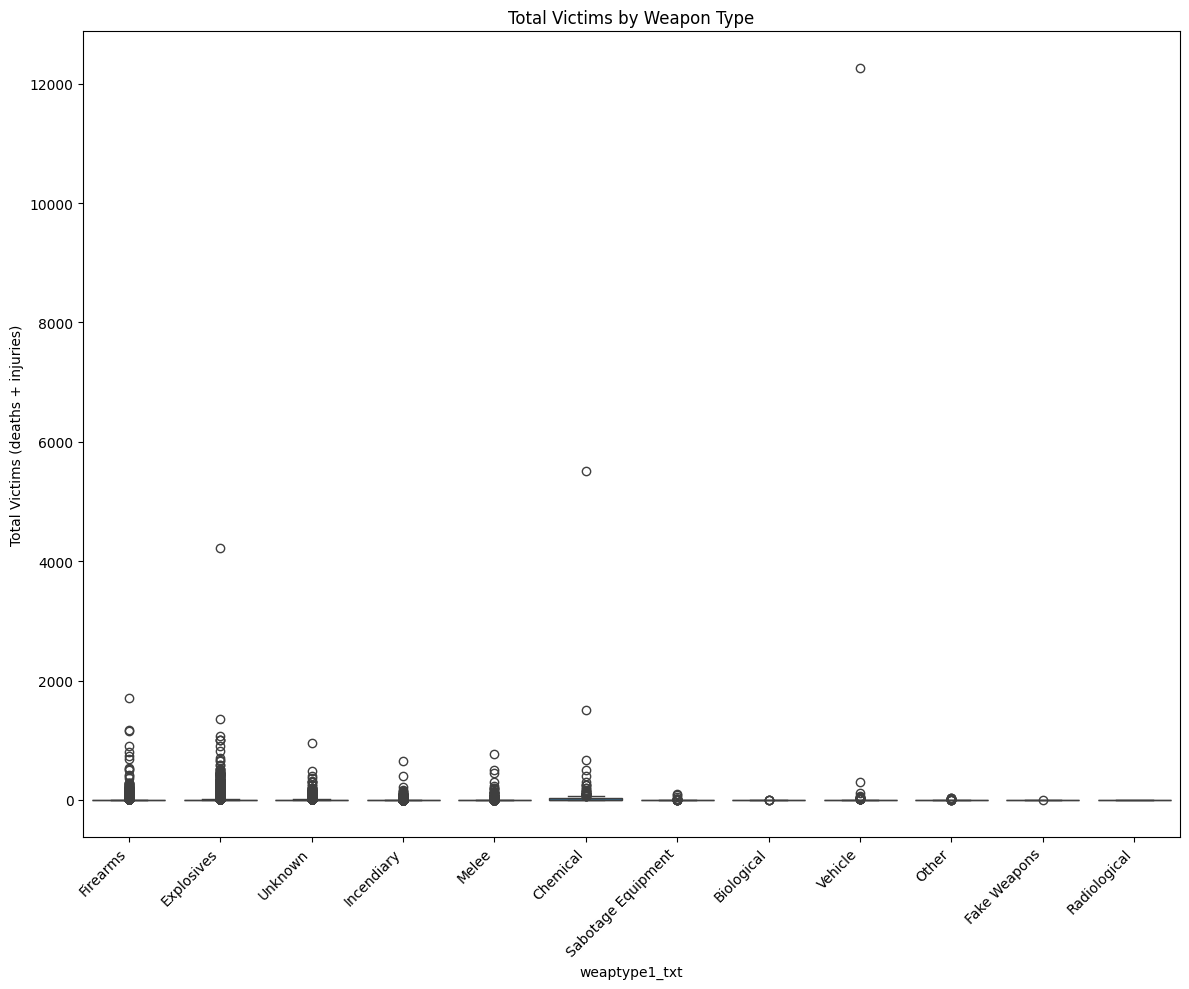

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.boxplot(x='weaptype1_txt', y='total_victim', data=df_1990)
plt.xticks(rotation=45, ha='right')
plt.title("Total Victims by Weapon Type")
plt.ylabel("Total Victims (deaths + injuries)")

plt.tight_layout()
plt.show()


In [22]:
import plotly.express as px
fig = px.box(df_1990,
             x='weaptype1_txt',
             y='total_victim',
             points='all',  # 데이터 포인트 전부 표시
             title='Total Victims by Weapon Type (Interactive)',
             labels={'weaptype1_txt': 'Weapon Type', 'total_victim': 'Total Victims'},
             height=600)
fig.update_layout(xaxis_tickangle=-45)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

### **이상치!**
- Vehicle : 9.11테러 (12,263)
- Chemical
  - 1995/3/20 지하철 구내에 사린가스를 살포해 수천명의 사상자를 낸 옴진리교 사건 (5,513)
    - nkill = 13,
    - nwound = 5,500
  - 2016/3/9 이라크 타자 쿠르마투에서 ISIL가 일으킨 사건 (1,503)
    - ISIL은 이라크 및 시리아 북부에 거점을 둔 수니파 무장단체
    - nkill = 3
    - nwound = 1,500
- Explosives : 1998/8/7 케냐의 미대사관 폭탄 테러 사건 (알카에다가 일으킴) (4,224)
  - nkill = 224
  - nwound = 4,000


## **가설(2)에 대한 ANOVA 검정**
- 집단별 정규성 & 등분산성 가정 필요 (이건 사전 검정 가능)

- 귀무가설(H₀): 모든 무기 유형에서 평균 피해 규모는 같다

- 대립가설(H₁): 적어도 하나의 무기 유형은 평균 피해 규모가 다르다

<br>

- 독립변수: weaptype1_txt (무기 유형, 범주형)
- 종속변수: total_victim (사망자 + 부상자 수, 수치형)

- 검정 목적 : 무기 유형에 따라 피해 규모(total_victim)에 통계적으로 유의한 차이가 존재하는가?

In [23]:
from scipy.stats import f_oneway

# 무기 유형별로 그룹 나누기
groups = [group['total_victim'].dropna().values
          for _, group in df_1990.groupby('weaptype1_txt') if len(group) > 10]

# ANOVA 검정 수행
f_stat, p_val = f_oneway(*groups)

print("F-통계량:", round(f_stat, 3))
print(f"p-value: {p_val:.3f}")

if p_val < 0.05:
    print("→ 무기 유형에 따라 피해 규모의 평균이 통계적으로 유의미하게 다름.")
else:
    print("→ 무기 유형 간 피해 규모 차이는 통계적으로 유의하지 않음.")

F-통계량: 117.786
p-value: 0.000
→ 무기 유형에 따라 피해 규모의 평균이 통계적으로 유의미하게 다름.


### **해석!**
- F통계량이 1보다 매우 크고 180.346을 나타냄
- p-value = 0 : 귀무가설(모든 무기 평균 피해 같음) 기각
- 무기 유형에 따라 피해 규모의 평균이 통계적으로 유의미하게 다름.

## **가설(2)에 대한 Kruskal-Wallis H-test 검정**
- 정규성 가정 없이,
- 여러 집단 간 중앙값 또는 분포의 차이가 있는지를 검정하는 비모수적 일원 분산분석

<br>

- 귀무가설(H₀): 모든 무기 유형의 피해자 수 분포는 동일하다 (즉, 중앙값에 차이가 없다)
- 대립가설(H₁): 적어도 하나의 무기 유형은 다른 무기 유형과 피해자 수 분포가 다르다

In [24]:
from scipy.stats import kruskal

# 동일하게 그룹화
groups = [group['total_victim'].dropna().values
          for _, group in df_1990.groupby('weaptype1_txt') if len(group) > 10]

# Kruskal-Wallis H-test
h_stat, p_val = kruskal(*groups)

print("H-통계량:", round(h_stat, 3))
print("p-value:", p_val)

if p_val < 0.05:
    print("→ 무기 유형에 따라 피해 규모 분포에 유의미한 차이가 있음")
else:
    print("→ 피해 규모는 무기 유형 간 유의미한 차이가 없음")


H-통계량: 9465.586
p-value: 0.0
→ 무기 유형에 따라 피해 규모 분포에 유의미한 차이가 있음


### **해석!**
- H-통계량 = 9,465.586 : 그룹 간 순위 차이가 매우 큼

- p-value = 0.0 : 귀무가설 기각 → 무기 유형에 따라 피해 분포가 유의하게 다름 <br>

→ 무기 유형이 피해자 수(사망자+부상자)에 통계적으로 유의한 영향을 준다.

 <br>

- Kruskal-Wallis 검정 결과,

- 무기 유형에 따라 피해자 수 분포에 유의미한 차이가 있는 것으로 나타났다. (H = 10,382.62, p < 0.001)

- 이는 일부 무기 유형이 다른 유형보다 훨씬 더 치명적인 결과를 초래한다는 사실을 알 수 있다.

## **가설(2) H-test의 사후분석**

1. 분산분석(ANOVA or Kruskal-Wallis) 결과
- 전체 그룹(무기 유형 간)에 유의한 차이 존재 확인 <br>

→  하지만 어떤 그룹끼리 차이가 나는지는 알 수 없음

<br>

2. 사후 분석(Post-hoc test)의 목적
- 각 무기 유형 쌍(pair)에 대해 피해 규모 분포 차이를 개별적으로 비교 <br>

→ p-value < 0.05인 쌍은 유의미한 차이가 있음

<br>

3. Dunn’s test는 Kruskal-Wallis에 적합한 사후분석 도구
- 정규성, 등분산 가정 필요 없음

- 비모수적 데이터(테러 피해자 수처럼 편향된 분포)에 매우 적합
- p-value 보정이 들어갔기 때문에 신뢰도 높음

<br>

4. p-value 보정
- 사후 분석에서 다중 비교 문제를 해결하기 위해 p-value 보정한다.

- 통계 분석에서는 제1종 오류(여러 그룹을 동시에 비교할 때 잘못된 유의성)이 발생할 가능성이 높아지기 때문에,
- p-value를 보정(adjust)해서 과도한 유의성 판정을 방지한다.

<br>

- 무기 유형이 12개 → 66쌍의 비교가 발생
- 비교가 많아질수록 우연히 p < 0.05가 나올 확률도 높아짐 → 오류 증가
- 이를 방지하기 위해 p-value 보정이 필요

<br>

5. 보정 방식 종류

| 보정 방식 | 설명 | 보수성 | 언제 사용? |
|-----------|------|--------|------------|
| **Bonferroni** | 가장 단순하고 엄격. α / 비교 수만큼 p값 조정 | 매우 보수적 | 신뢰가 최우선일 때 |
| **Holm** | 단계적 Bonferroni. 덜 보수적 | 중간 | 대부분의 일반 분석에 권장 |
| **Benjamini-Hochberg (FDR)** | 거짓 발견률(FDR) 제어, 유의성 판정을 많이 허용 | 덜 보수적 | 탐색적 분석, 생명과학 분야 |
| **Sidak** | Bonferroni보다 약간 덜 보수적 수식 | 보수적 | 대안적 Bonferroni |
| **None** | 보정 안 함 | 위험 | 참고용 또는 보정 전 결과 확인 시 |





In [27]:
!pip install scikit-posthocs

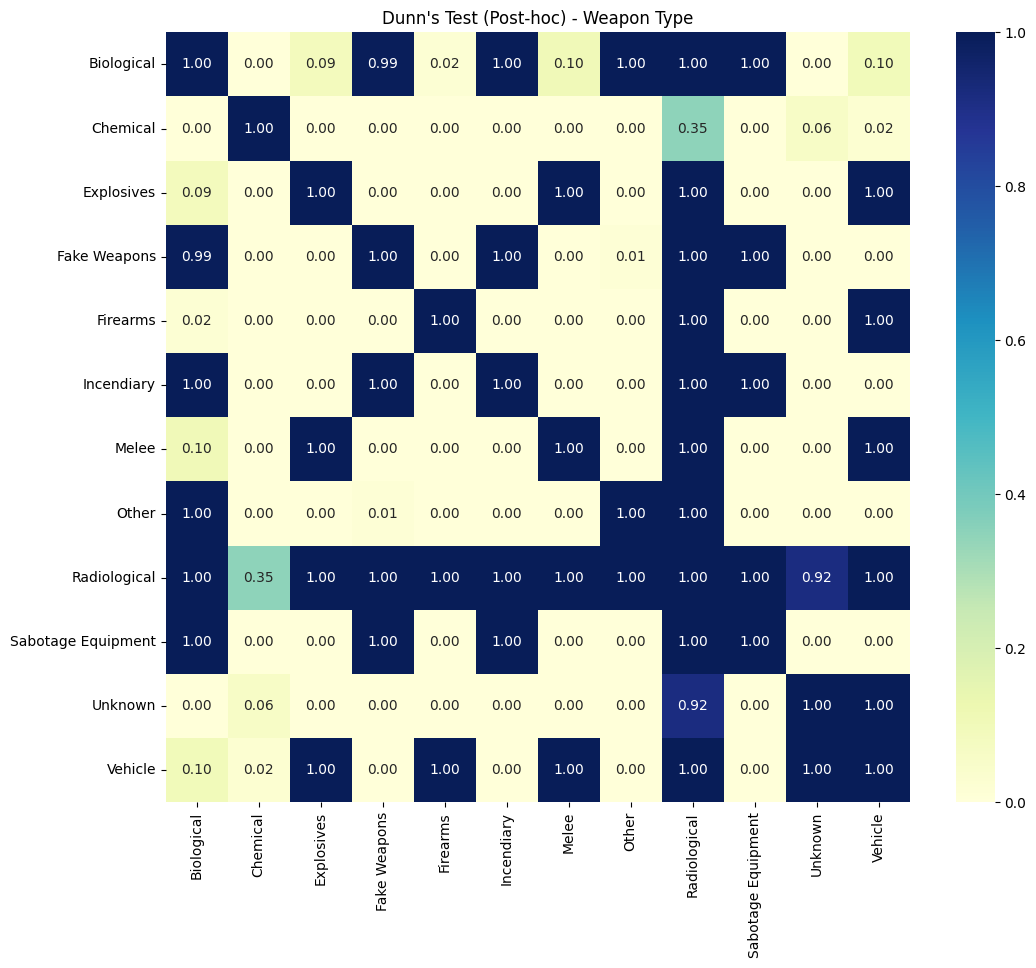

In [28]:
import scikit_posthocs as sp
import pandas as pd

# Dunn’s test 실행
dunn_result = sp.posthoc_dunn(df_1990,
                               val_col='total_victim',
                               group_col='weaptype1_txt',
                               p_adjust='bonferroni')  # 보정 방식

# 결과 확인
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(dunn_result, cmap='YlGnBu', annot=True, fmt='.2f')
plt.title("Dunn's Test (Post-hoc) - Weapon Type")
plt.show()


### **해석!**
- 각 셀 값은 p-value (두 무기 유형 간 피해 규모 분포 차이의 유의확률)

 <br>

1. 유의한 차이 있음 (p < 0.05)

- Biological vs Chemical → p = 0.00 → 차이 있음

- Chemical vs 모든 무기 유형 → 대부분 p = 0.00 <br>
→ Chemical 무기 피해 규모가 대부분 무기보다 유의하게 큼

- Vehicle vs 대부분의 무기 유형 → p = 0.00<br>
→ 차량 기반 공격의 피해 분포도 거의 모든 무기와 유의하게 다름

<br>

2. 유의한 차이 없음 (p ≈ 1.00)

- Firearms vs Fake Weapons → p = 1.00

- Other vs Radiological → p = 1.00 <br>
→ 피해자 수 분포 차이가 거의 없음
